In [4]:
from random import randint

print(randint(1,4))

2


In [6]:
y = 9
bottom_pos = y+1 if y+1 <= 9 else 9
bottom_pos

9

In [9]:
for i in range(1, 1):
    print(i)

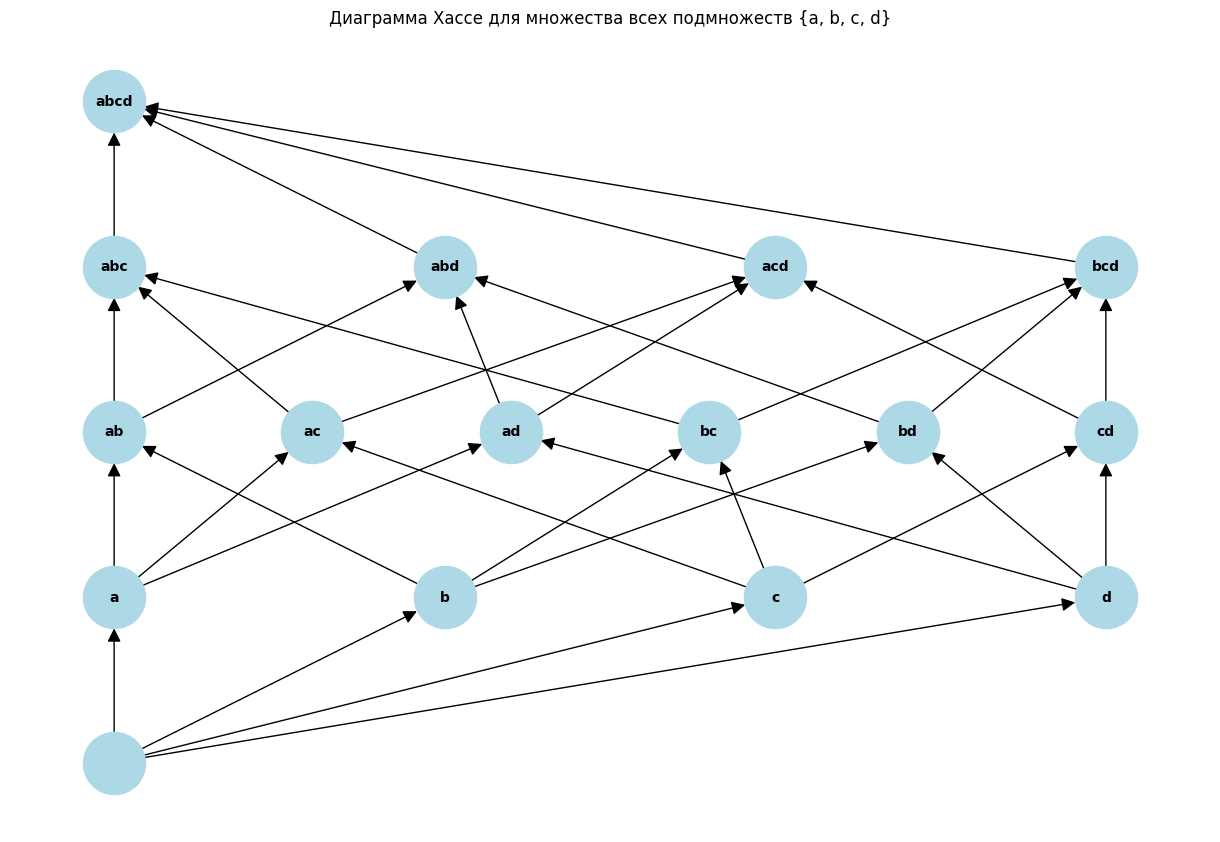

In [2]:
# ... existing code ...

import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np

# Создаем множество
elements = ['a', 'b', 'c', 'd']

# Генерируем все подмножества
power_set = []
for i in range(len(elements) + 1):
    power_set.extend(combinations(elements, i))

# Преобразуем кортежи в строки для удобства отображения
power_set = [''.join(sorted(subset)) for subset in power_set]

# Создаем граф
G = nx.DiGraph()

# Добавляем узлы
for subset in power_set:
    G.add_node(subset)

# Добавляем ребра (только непосредственные включения)
for subset1 in power_set:
    for subset2 in power_set:
        if len(subset1) + 1 == len(subset2):
            # Проверяем, является ли subset1 подмножеством subset2
            if all(elem in subset2 for elem in subset1):
                G.add_edge(subset1, subset2)

# Позиционирование узлов с центрированием
pos = {}
max_width = 0
level_sizes = {}

# Сначала определим размеры каждого уровня
for i in range(len(elements) + 1):
    level_subsets = [s for s in power_set if len(s) == i]
    level_sizes[i] = len(level_subsets)
    max_width = max(max_width, len(level_subsets))

# Теперь позиционируем узлы
for i in range(len(elements) + 1):
    level_subsets = [s for s in power_set if len(s) == i]
    if level_subsets:
        # Центрируем узлы на каждом уровне
        x_positions = np.linspace(-1, 1, len(level_subsets))
        for j, subset in enumerate(level_subsets):
            pos[subset] = (x_positions[j], i)

# Рисуем граф
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=2000, font_size=10, font_weight='bold',
        arrows=True, arrowsize=20)
plt.title('Диаграмма Хассе для множества всех подмножеств {a, b, c, d}')
plt.axis('off')  # Отключаем оси для лучшего вида
plt.show()